In [37]:
import numpy as np
from qiskit import *
from random import random, randint
import matplotlib.pyplot as plt

In [32]:
def process_output(circuit, quantum_reg, classical_reg, s):
    # s = 100 # arbitrary S, will shift to match output later
    arr = []

    simulator = Aer.get_backend('aer_simulator')

    job = execute(circuit, simulator, shots=s)
    result = job.result()
    counts = result.get_counts(circuit)
    return counts

def rotation(register, angles):
    measurement = ClassicalRegister(1)
    qc = QuantumCircuit(register, measurement)
    for i in range(len(register)):
        qc.ry(angles[i], i)
    
    for i in range(len(register) - 1):
        qc.cx(i, i + 1)


    qc.measure(0, 0)
    s = 100
    shots = process_output(qc, register, measurement, 100)
    for key, val in shots.items():
        shots[key] = val / s
    return shots

q = QuantumRegister(4)
initial_angles = [2 * np.pi * random() for _ in range(4)]

rotation(q, initial_angles)

{'1': 0.24, '0': 0.76}

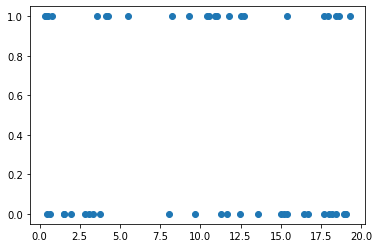

In [42]:
# random samples
entries = 50

x = []
for _ in range(entries):
    temp = 20 * random()
    while temp in x:
        temp = 20 * random()
    x.append(temp)

y = [randint(0, 1) for _ in range(entries)]

plt.scatter(x, y)

In [43]:
def mse(shots_count, expected_value):
    probability_of_expected = shots_count[expected_value]
    return (1 - probability_of_expected) ** 2

# y_values are either 0, 1
# received_measurements are the dictionary of probabilities
def count_costs(x_values, y_values, angles, received_measurements):
    cost = 0

    for i in range(len(x_values)):
        cost += mse(received_measurements[i], y_values[i])
    
    return cost / len(x_values)
    
